# Report: Distribution of weather datasetin Aachen, Germany

This example uses open data from Mobilithek ( https://www.mcloud.de/downloads/mcloud/27899FD1-EBC5-428D-9214-996752F42EBB/AirQuality_Datensatz_August2021_Aachen.csv) and Meteostat (https://meteostat.net/en/station/10501?t=2021-08-01/2021-08-31) to render a correlation among various environmental attributes.


Everyday weather and meteorological data are measured in various ways around the world. Some attributes that are crucial for our day-to-day life, like PM2.5, and PM10 are mostly relevant to notice. So my outcome is to work with Germany's weather data and find a correlation among the various attributes of the datasets, whether there is a significant relation among them or not. SO to find them, I measure some correlations among attributes.

## Install dependencies
Initially, install all required dependencies. The specific version of SQLAlchemy is needed because SQLAlchemy 2.0 does not work with pandas yet.

In [1]:
%pip install pandas
%pip install seaborn
%pip install matplotlib
%pip install 'SQLAlchemy==1.4.46'

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: "'SQLAlchemy==1.4.46'"


## Load data
I meanly work with two data sources from Aachen city. First Load the dataset from the local database which has been created through the exploration file. Create a pandas dataframe using the local sqlite file.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

aachen_mobilithek_data = pd.read_sql_table('aachen_mobilithek', 'sqlite:///data.sqlite')
aachen_meteostat_data = pd.read_sql_table('aachen_meteostat', 'sqlite:///data.sqlite')

## Visualize Aachen Meteostat Dataset and find summary of that.

In [3]:
aachen_meteostat_data.head()

,Date,Hour,temp,dwpt,rhum,prcp,wdir,wspd,wpgt,pres
0,2021-08-01,0,14.1,13.0,93,0.0,216,9.3,14.8,1010.9
1,2021-08-01,1,13.8,12.9,94,0.0,212,11.1,16.7,1010.6
2,2021-08-01,2,13.6,13.0,96,0.0,213,11.1,16.7,1010.3
3,2021-08-01,3,13.4,12.5,94,0.0,215,13.0,18.5,1010.3
4,2021-08-01,4,13.2,12.6,96,0.0,217,13.0,18.5,1010.1


In [4]:
aachen_meteostat_data.describe()

,Hour,temp,dwpt,rhum,prcp,wdir,wspd,wpgt,pres
count,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000
mean,11.500000,16.532124,13.147446,81.596774,0.093683,215.172043,12.230780,21.530645,1016.720565
std,6.926843,3.071153,1.497686,12.478948,0.259672,87.954151,5.197554,8.150745,5.406774
min,0.000000,9.800000,8.400000,48.000000,0.000000,1.000000,3.700000,7.400000,1001.500000
25%,5.750000,14.275000,12.200000,73.000000,0.000000,194.000000,7.400000,14.800000,1014.200000
50%,11.500000,16.100000,13.300000,84.000000,0.000000,225.000000,11.100000,20.400000,1017.200000
75%,17.250000,18.400000,14.300000,91.000000,0.000000,254.000000,14.800000,25.900000,1020.000000
max,23.000000,25.700000,16.500000,100.000000,2.200000,360.000000,29.600000,46.300000,1027.300000


## Transform aachen_meteostat_data datasets to meaningfull dataset and renaming columns

In [5]:
aachen_meteostat_data.rename(columns={
    "dwpt": "dew point",
    "prcp": "precipitation",
    "rhum": "relative humidity",
    "wdir": "wind direction",
    "wspd": "average wind speed",
    "wpgt": "average wind gust",
    "pres": "pressure",
}, inplace=True)
aachen_meteostat_data.head(5)

,Date,Hour,temp,dew point,relative humidity,precipitation,wind direction,average wind speed,average wind gust,pressure
0,2021-08-01,0,14.1,13.0,93,0.0,216,9.3,14.8,1010.9
1,2021-08-01,1,13.8,12.9,94,0.0,212,11.1,16.7,1010.6
2,2021-08-01,2,13.6,13.0,96,0.0,213,11.1,16.7,1010.3
3,2021-08-01,3,13.4,12.5,94,0.0,215,13.0,18.5,1010.3
4,2021-08-01,4,13.2,12.6,96,0.0,217,13.0,18.5,1010.1


## Visualize Aachen Mobilithek Dataset and find summary of that.

In [6]:
aachen_mobilithek_data.head()

,parameter,value,NumberOfVehicles,Geohash7,Period
0,Humidity,36.18,3,u1h2gky,2021-08-01 00:00:00 UTC
1,Humidity,39.80,3,u1h2gmn,2021-08-01 00:00:00 UTC
2,Humidity,34.33,3,u1h2gmp,2021-08-01 00:00:00 UTC
3,Humidity,38.33,2,u1h2gmq,2021-08-01 00:00:00 UTC
4,Humidity,40.09,2,u1h2gmj,2021-08-01 00:00:00 UTC


In [7]:
aachen_mobilithek_data.describe()

,value,NumberOfVehicles
count,165986.000000,165986.000000
mean,18.614109,2.262462
std,14.812321,0.621699
min,0.000000,2.000000
25%,4.960000,2.000000
50%,14.690000,2.000000
75%,28.820000,2.000000
max,84.370000,7.000000


## Transform Aachen Mobilithek Dataset and caculate the average of "value" and "NumberOfVehicles" for each day and periods

In [8]:
df_main = pd.DataFrame(aachen_mobilithek_data)

# Calculate average value based on 'Period' and 'parameter' groups
mean_values = df_main.groupby(['Period', 'parameter']).agg({
    'value': 'mean',
    'NumberOfVehicles': 'mean',
    'Geohash7': lambda x: np.nan if all(pd.isna(x)) else x.dropna().iloc[0]
}).reset_index()

# Remove duplicate rows for the groupby combination
df_main.drop_duplicates(subset=['Period', 'parameter'], keep=False, inplace=True)

# Merge the mean values into the main dataset
df_transformed = pd.concat([df_main, mean_values])

# Reset the index
df_transformed.reset_index(drop=True, inplace=True)

# Replace the transformed dataset with the original dataset
aachen_mobilithek_data = df_transformed

aachen_mobilithek_data

,parameter,value,NumberOfVehicles,Geohash7,Period
0,PM10,4.200000,2.000000,u1h2fen,2021-08-01 07:00:00 UTC
1,PM2.5,4.290000,2.000000,u1h2fen,2021-08-01 07:00:00 UTC
2,Humidity,39.000000,2.000000,u1h2fen,2021-08-01 07:00:00 UTC
3,Humidity,62.100000,2.000000,u1h2f7f,2021-08-02 05:45:00 UTC
4,Humidity,43.170000,2.000000,u1h2fk3,2021-08-02 06:15:00 UTC
...,...,...,...,...,...
4421,Temperature,24.994000,2.000000,u1h2gmh,2021-08-30 17:30:00 UTC
4422,Humidity,42.104944,2.712695,u1h2f4r,2021-08-31 00:00:00 UTC
4423,PM10,12.032533,2.817757,u1h2fg3,2021-08-31 00:00:00 UTC
4424,PM2.5,10.907362,2.812909,u1h2fp0,2021-08-31 00:00:00 UTC


## Finding correlation among various weather attributes via data visualization?

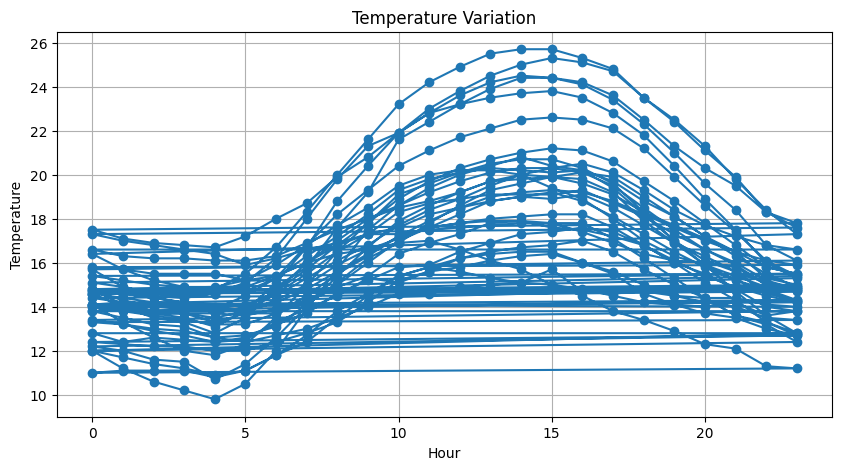

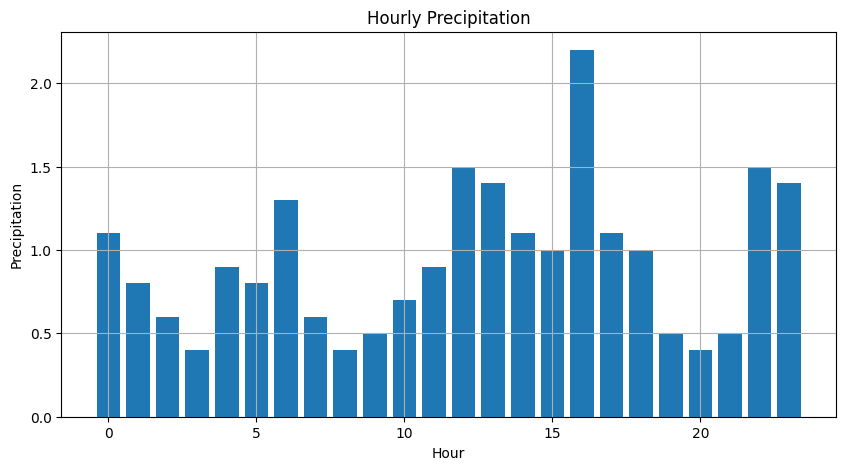

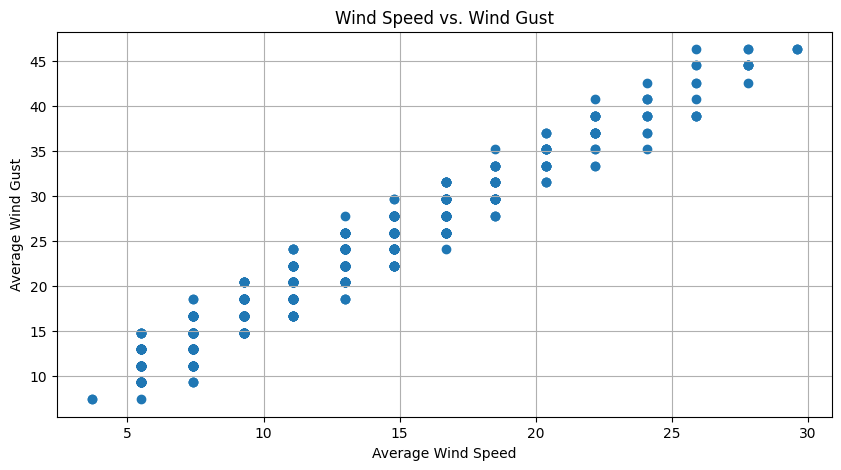

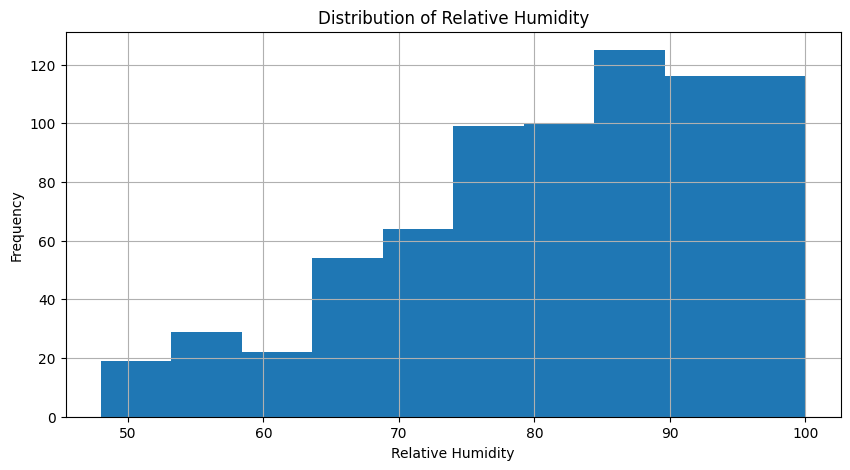

In [9]:
# Line plot of temperature over time
plt.figure(figsize=(10, 5))
plt.plot(aachen_meteostat_data['Hour'], aachen_meteostat_data['temp'], marker='o')
plt.xlabel('Hour')
plt.ylabel('Temperature')
plt.title('Temperature Variation')
plt.grid(True)
plt.show()

# Bar plot of precipitation by hour
plt.figure(figsize=(10, 5))
plt.bar(aachen_meteostat_data['Hour'], aachen_meteostat_data['precipitation'])
plt.xlabel('Hour')
plt.ylabel('Precipitation')
plt.title('Hourly Precipitation')
plt.grid(True)
plt.show()

# Scatter plot of wind speed and wind gust
plt.figure(figsize=(10, 5))
plt.scatter(aachen_meteostat_data['average wind speed'], aachen_meteostat_data['average wind gust'])
plt.xlabel('Average Wind Speed')
plt.ylabel('Average Wind Gust')
plt.title('Wind Speed vs. Wind Gust')
plt.grid(True)
plt.show()

# Histogram of relative humidity
plt.figure(figsize=(10, 5))
plt.hist(aachen_meteostat_data['relative humidity'], bins=10)
plt.xlabel('Relative Humidity')
plt.ylabel('Frequency')
plt.title('Distribution of Relative Humidity')
plt.grid(True)
plt.show()

A correlation matrix is a square matrix that displays the correlations between pairs of variables in a dataset. Each cell in the matrix represents the correlation coefficient, which measures the strength and direction of the linear relationship between two variables.

The correlation coefficient is a value between -1 and 1. A correlation of 1 indicates a perfect positive linear relationship, -1 indicates a perfect negative linear relationship, and 0 indicates no linear relationship between the variables. The closer the correlation coefficient is to 1 or -1, the stronger the relationship.

A correlation matrix is useful for understanding the relationships between variables in a dataset. It allows you to identify which variables are positively or negatively correlated and the strength of those correlations. By visualizing the correlation matrix, you can quickly identify patterns and dependencies among variables.

### Find Correlation Matrix Among Features for Aachen Meteostat Dataset

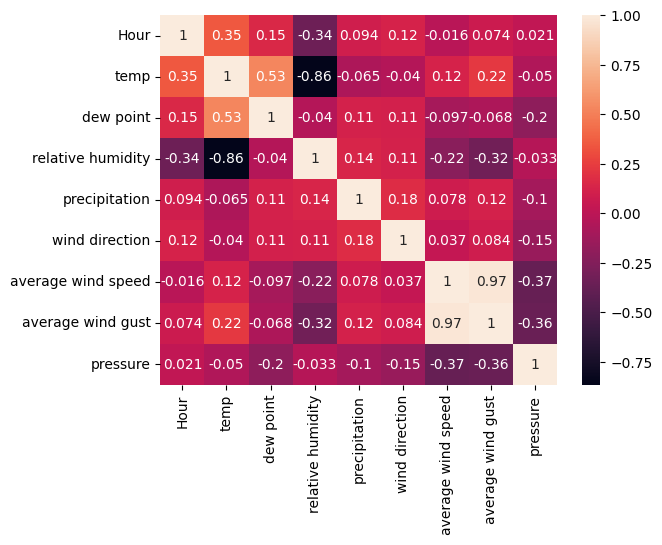

In [10]:
import seaborn as sn
aachen_meteostat_data_corr = aachen_meteostat_data.drop("Date", axis=1)
corr_matrix = aachen_meteostat_data_corr.corr()
sn.heatmap(corr_matrix, annot=True)
plt.show()

## Visualize different insight for Aachen Mobilithek Dataset

To create meaningful visualizations for the given dataset, we can consider different plot types based on the variables available

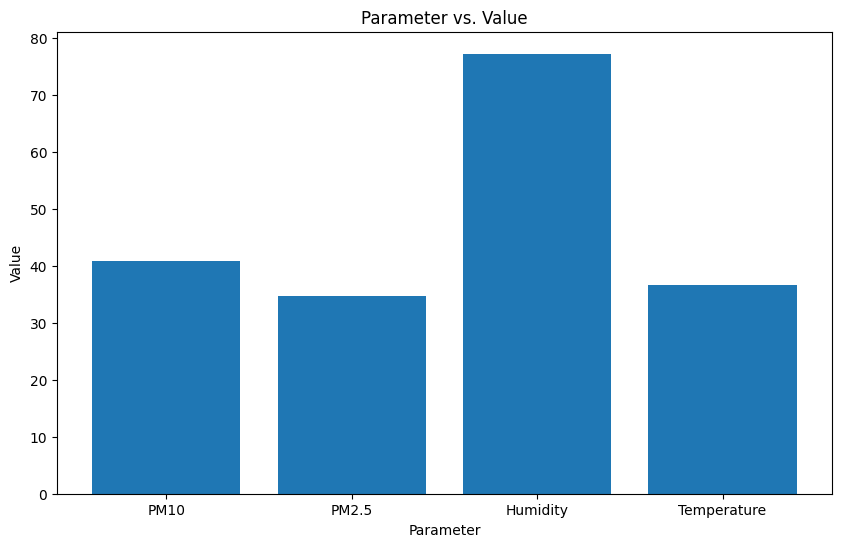

In [11]:
# This plot shows the different parameter values and their corresponding values.
plt.figure(figsize=(10, 6))
plt.bar(aachen_mobilithek_data['parameter'], aachen_mobilithek_data['value'])
plt.xlabel('Parameter')
plt.ylabel('Value')
plt.title('Parameter vs. Value')
plt.show()

## Scatter Plot - Value vs. NumberOfVehicles:
### This plot shows the relationship between the value and the number of vehicles.

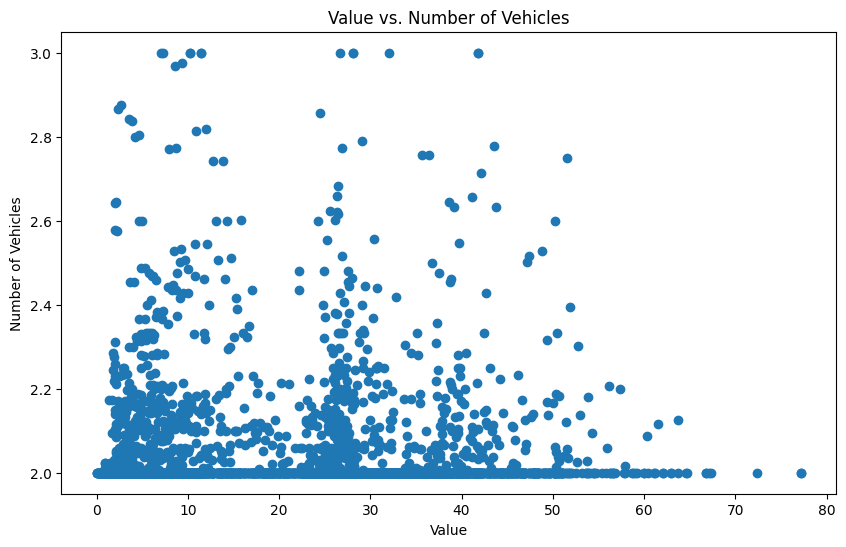

In [12]:
# This plot shows the relationship between the value and the number of vehicles.
plt.figure(figsize=(10, 6))
plt.scatter(aachen_mobilithek_data['value'], aachen_mobilithek_data['NumberOfVehicles'])
plt.xlabel('Value')
plt.ylabel('Number of Vehicles')
plt.title('Value vs. Number of Vehicles')
plt.show()


## Grouped Bar Plot - Parameter and NumberOfVehicles:
### This plot shows the parameter and the number of vehicles grouped together.

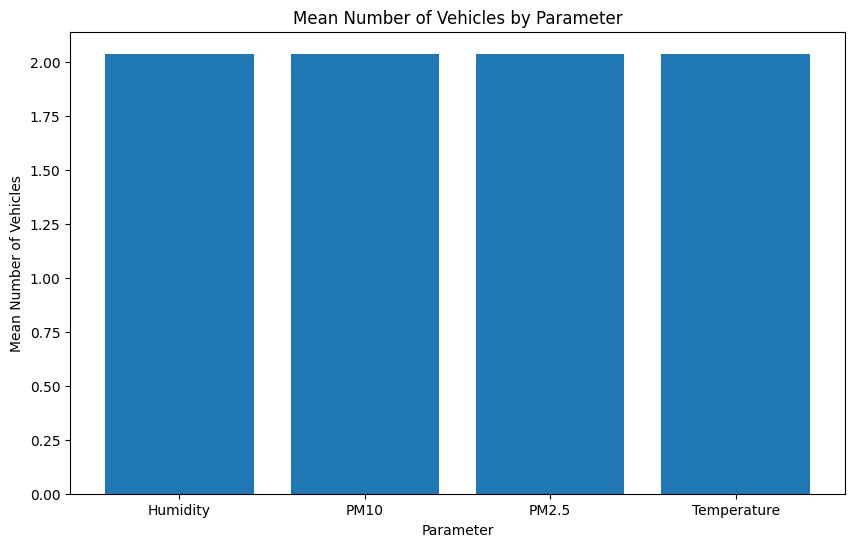

In [13]:
# Grouping the data by parameter and calculating the mean of NumberOfVehicles
grouped_data = aachen_mobilithek_data.groupby('parameter')['NumberOfVehicles'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(grouped_data['parameter'], grouped_data['NumberOfVehicles'])
plt.xlabel('Parameter')
plt.ylabel('Mean Number of Vehicles')
plt.title('Mean Number of Vehicles by Parameter')
plt.show()


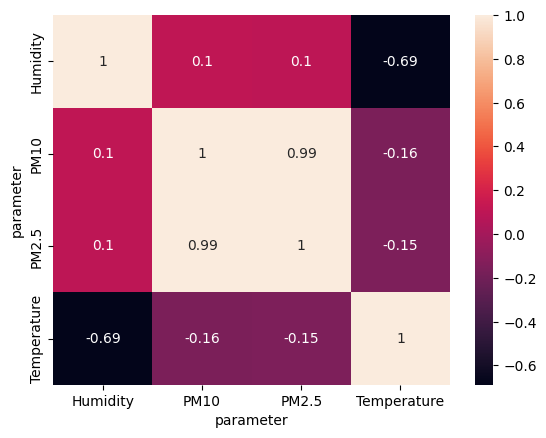

In [14]:
# Aggregate duplicate entries by taking the mean value
aachen_mobilithek_data = aachen_mobilithek_data.drop('Geohash7', axis=1)
aggregated_df = aachen_mobilithek_data.groupby(['Period', 'parameter']).mean().reset_index()

# Reconstruct the dataset using pivot
reconstructed_df = aggregated_df.pivot(index='Period', columns='parameter', values='value').reset_index()

# Exclude non-numeric columns from correlation calculation
numeric_cols = reconstructed_df.select_dtypes(include=['float64', 'int64']).columns
numeric_df = reconstructed_df[numeric_cols]

# Convert non-convertible values to NaN
numeric_df = numeric_df.apply(pd.to_numeric, errors='coerce')

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Display the correlation matrix

sn.heatmap(corr_matrix, annot=True)
plt.show()


## Conclusion
**Here are some theory about correlation matrix** 

**Strength of correlation:** The correlation coefficient ranges between -1 and 1. A value of -1 indicates a perfect negative correlation, 0 indicates no correlation, and 1 indicates a perfect positive correlation. The closer the value is to -1 or 1, the stronger the correlation.

**Positive correlation:** If the correlation coefficient is positive (closer to 1), it indicates a positive relationship between the variables. As one variable increases, the other tends to increase as well. For example, if variable A and variable B have a correlation coefficient of 0.8, it suggests a strong positive relationship between the two variables.

**Negative correlation:** If the correlation coefficient is negative (closer to -1), it indicates a negative relationship between the variables. As one variable increases, the other tends to decrease. For example, if variable X and variable Y have a correlation coefficient of -0.6, it suggests a moderate negative relationship between the two variables.

**No correlation:** If the correlation coefficient is close to 0, it suggests no linear relationship between the variables. However, it is important to note that there might still be other types of relationships or nonlinear associations between the variables.

**Correlation does not imply causation:** It's crucial to remember that correlation does not imply causation. Even if two variables are strongly correlated, it does not necessarily mean that changes in one variable are causing changes in the other. Correlation measures the strength and direction of the relationship, but it does not determine causality.

**Multiple correlations:** When analyzing a correlation matrix with multiple variables, it is important to consider the relationships between all pairs of variables. Look for patterns and consistent associations between variables to gain a comprehensive understanding of the relationships in the dataset.


**So from that theory and our observation from both Aachen datasets, we have seen that, in aachen_mobilithek_data datasets, the temperature negatively correlates with other parameters of the datasets. And on the other hand, in aachen_meteostat_data, we have seen a positive and negative correlation among the parameters. But the temperature has slightly much correlation with humidity among both datasets.**